<a href="https://colab.research.google.com/github/Amanblackdevil/Machine-Learning/blob/main/Decision_Tree_Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [19]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [15]:
df.shape

(1025, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
#Declare feature vector and target variable
X = df.drop(['target'], axis=1)
y = df['target']

In [21]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [23]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

#fit the model
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [35]:
#prediction
y_pred_gini = gini.predict(X_test)

In [36]:
#Checking accuracey with gini
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gini)

0.6780487804878049

In [37]:
y_pred_train = gini.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.7695121951219512

In [38]:
gini.score(X_test, y_test)

0.6780487804878049

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.25, 0.5, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.75, 0.5, 'x[12] <= 2.5\ngini = 0.354\nsamples = 422\nvalue = [97, 325]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.234\nsamples = 317\nvalue = [43, 274]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 105\nvalue = [54, 51]')]

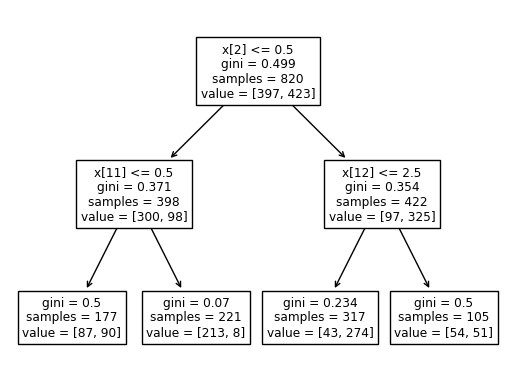

In [39]:
#Visualize
from sklearn import tree
tree.plot_tree(gini.fit(X_train, y_train))